Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00       124

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180


Confusion Matrix:
[[ 56   0]
 [  0 124]]

Accuracy Score: 1.00


C:\Users\HP\AppData\Local\Temp\ipykernel_17756\836372219.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.sort_values(ascending=False),


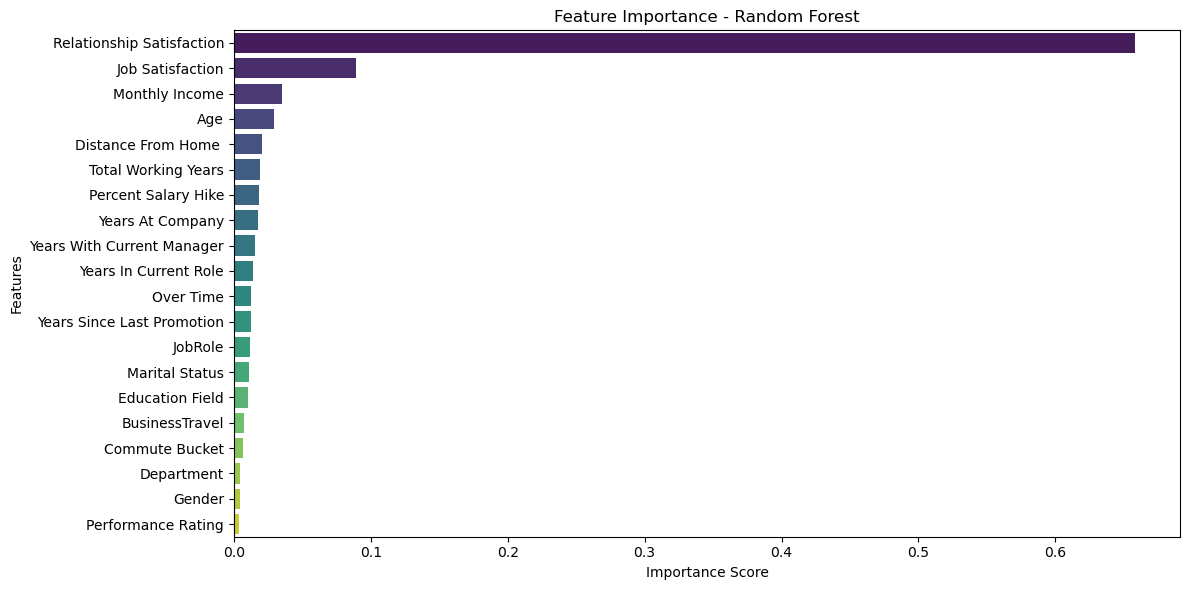

In [2]:
# Step 0: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Load the dataset from Excel
# ⚠️ Replace the file name below with your actual file path
df = pd.read_excel(r"C:\Users\HP\OneDrive\Desktop\Data Analyst\Projects\67b395b530466_TACT4OPS\TACT4OPS\Code&Run_Modelexcel.xlsx")

# Step 2: Drop unnecessary or leakage-prone columns
# Assumption: 'Participant' is an ID, 'Attrition Risk Score' is target-derived
df.drop(columns=['Participant', 'Attrition Risk Score'], errors='ignore', inplace=True)

# Step 3: Basic data cleaning - Handle missing values
# You can choose to fill or drop missing values
df.dropna(inplace=True)  # Alternatively: df.fillna(df.median(), inplace=True)

# Step 4: Label encode categorical variables (for Random Forest, LabelEncoding is sufficient)
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Step 5: Define features (X) and target (y)
# ⚠️ Make sure the column name matches exactly
target_column = 'Estimated Attrition Flag'

if target_column not in df.columns:
    raise ValueError(f"'{target_column}' not found in dataset columns.")

X = df.drop(columns=[target_column])
y = df[target_column]

# Step 6: Split dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 7: Train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = rf.predict(X_test)

# Step 9: Evaluate model performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"\nAccuracy Score: {accuracy_score(y_test, y_pred):.2f}")

# Step 10: Visualize Feature Importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance.sort_values(ascending=False), 
            y=feature_importance.sort_values(ascending=False).index,
            palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


In [3]:
correlation_with_target = df.corr(numeric_only=True)['Estimated Attrition Flag'].sort_values(ascending=False)
print("Top correlations with Estimated Attrition Flag:\n", correlation_with_target)



Top correlations with Estimated Attrition Flag:
 Estimated Attrition Flag      1.000000
Relationship Satisfaction     0.747967
Job Satisfaction              0.300981
Over Time                     0.141441
Marital Status                0.077495
Gender                        0.044300
Distance From Home            0.038343
Commute Bucket                0.025762
Performance Rating            0.010103
Education Field              -0.002252
Years Since Last Promotion   -0.010268
Department                   -0.016975
Total Working Years          -0.021207
JobRole                      -0.021966
Percent Salary Hike          -0.022772
Years At Company             -0.028789
Age                          -0.030491
BusinessTravel               -0.042092
Monthly Income               -0.045464
Years With Current Manager   -0.064998
Years In Current Role        -0.083388
Name: Estimated Attrition Flag, dtype: float64


In [4]:
print("Top 5 important features:\n", feature_importance.sort_values(ascending=False).head())


Top 5 important features:
 Relationship Satisfaction    0.658141
Job Satisfaction             0.089001
Monthly Income               0.035130
Age                          0.029032
Distance From Home           0.020397
dtype: float64


In [5]:
X = X.drop(columns=['Relationship Satisfaction', 'Performance Rating'])  # example suspects


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00       124

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180


Confusion Matrix:
[[ 56   0]
 [  0 124]]

Accuracy Score: 1.00


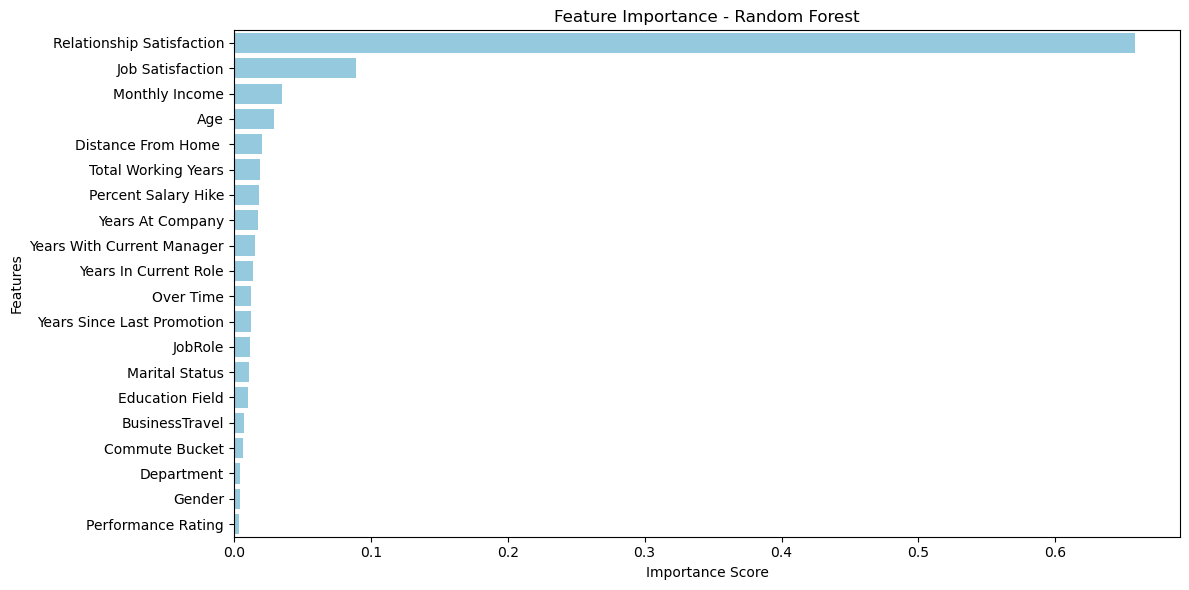

In [6]:
# Step 0: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Load the dataset from Excel
# ⚠️ Replace the file name below with your actual file path
df = pd.read_excel(r"C:\Users\HP\OneDrive\Desktop\Data Analyst\Projects\67b395b530466_TACT4OPS\TACT4OPS\Code&Run_Modelexcel.xlsx")

# Step 2: Drop unnecessary or leakage-prone columns
# Assumption: 'Participant' is an ID, 'Attrition Risk Score' is target-derived
df.drop(columns=['Participant', 'Attrition Risk Score'], errors='ignore', inplace=True)

# Step 3: Basic data cleaning - Handle missing values
# You can choose to fill or drop missing values
df.dropna(inplace=True)  # Alternatively: df.fillna(df.median(), inplace=True)

# Step 4: Label encode categorical variables (for Random Forest, LabelEncoding is sufficient)
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Step 5: Define features (X) and target (y)
# ⚠️ Make sure the column name matches exactly
target_column = 'Estimated Attrition Flag'

if target_column not in df.columns:
    raise ValueError(f"'{target_column}' not found in dataset columns.")

X = df.drop(columns=[target_column])
y = df[target_column]

# Step 6: Split dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 7: Train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = rf.predict(X_test)

# Step 9: Evaluate model performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"\nAccuracy Score: {accuracy_score(y_test, y_pred):.2f}")

# Step 10: Visualize Feature Importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize=(12, 6))
sns.barplot(
    x=feature_importance.sort_values(ascending=False).values,
    y=feature_importance.sort_values(ascending=False).index,
    color='skyblue'
)

plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


In [7]:
X = X.drop(columns=['Relationship Satisfaction', 'Job Satisfaction'])  # example suspects


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00       124

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180


Confusion Matrix:
[[ 56   0]
 [  0 124]]

Accuracy Score: 1.00


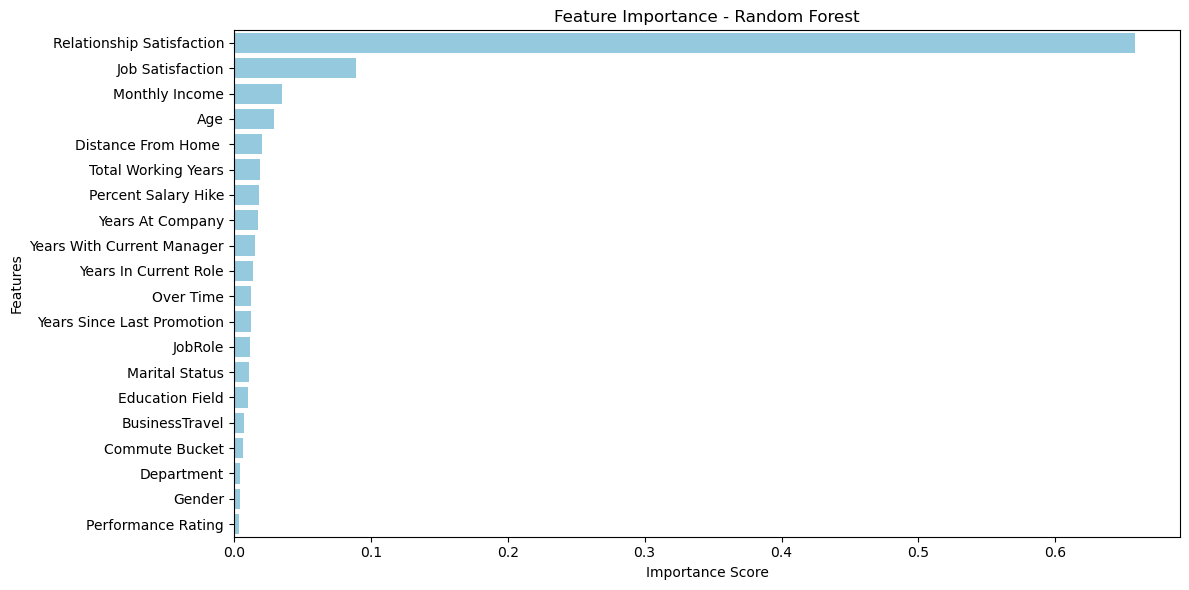

In [8]:
# Step 0: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Load the dataset from Excel
# ⚠️ Replace the file name below with your actual file path
df = pd.read_excel(r"C:\Users\HP\OneDrive\Desktop\Data Analyst\Projects\67b395b530466_TACT4OPS\TACT4OPS\Code&Run_Modelexcel.xlsx")

# Step 2: Drop unnecessary or leakage-prone columns
# Assumption: 'Participant' is an ID, 'Attrition Risk Score' is target-derived
df.drop(columns=['Participant', 'Attrition Risk Score'], errors='ignore', inplace=True)

# Step 3: Basic data cleaning - Handle missing values
# You can choose to fill or drop missing values
df.dropna(inplace=True)  # Alternatively: df.fillna(df.median(), inplace=True)

# Step 4: Label encode categorical variables (for Random Forest, LabelEncoding is sufficient)
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Step 5: Define features (X) and target (y)
# ⚠️ Make sure the column name matches exactly
target_column = 'Estimated Attrition Flag'

if target_column not in df.columns:
    raise ValueError(f"'{target_column}' not found in dataset columns.")

X = df.drop(columns=[target_column])
y = df[target_column]

# Step 6: Split dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 7: Train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = rf.predict(X_test)

# Step 9: Evaluate model performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"\nAccuracy Score: {accuracy_score(y_test, y_pred):.2f}")

# Step 10: Visualize Feature Importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize=(12, 6))
sns.barplot(
    x=feature_importance.sort_values(ascending=False).values,
    y=feature_importance.sort_values(ascending=False).index,
    color='skyblue'
)

plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


In [9]:
# Check correlations
correlation = df.corr(numeric_only=True)['Estimated Attrition Flag'].sort_values(ascending=False)
print(correlation)


Estimated Attrition Flag      1.000000
Relationship Satisfaction     0.747967
Job Satisfaction              0.300981
Over Time                     0.141441
Marital Status                0.077495
Gender                        0.044300
Distance From Home            0.038343
Commute Bucket                0.025762
Performance Rating            0.010103
Education Field              -0.002252
Years Since Last Promotion   -0.010268
Department                   -0.016975
Total Working Years          -0.021207
JobRole                      -0.021966
Percent Salary Hike          -0.022772
Years At Company             -0.028789
Age                          -0.030491
BusinessTravel               -0.042092
Monthly Income               -0.045464
Years With Current Manager   -0.064998
Years In Current Role        -0.083388
Name: Estimated Attrition Flag, dtype: float64


In [10]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False).head(10))


Relationship Satisfaction     0.658141
Job Satisfaction              0.089001
Monthly Income                0.035130
Age                           0.029032
Distance From Home            0.020397
Total Working Years           0.019109
Percent Salary Hike           0.018419
Years At Company              0.017740
Years With Current Manager    0.015174
Years In Current Role         0.013938
dtype: float64


Text(0.5, 1.0, 'Attrition Class Distribution')

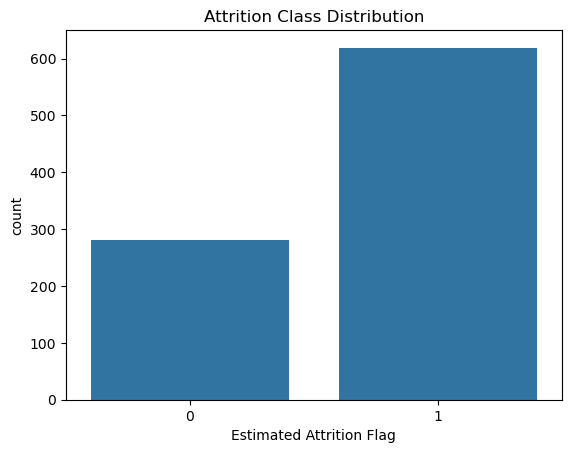

In [11]:
sns.countplot(x=y)
plt.title("Attrition Class Distribution")


In [12]:
# Drop suspected leakage features
X = X.drop(columns=['Over Time', 'Percent Salary Hike', 'Performance Rating'])


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00       124

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180


Confusion Matrix:
[[ 56   0]
 [  0 124]]

Accuracy Score: 1.00


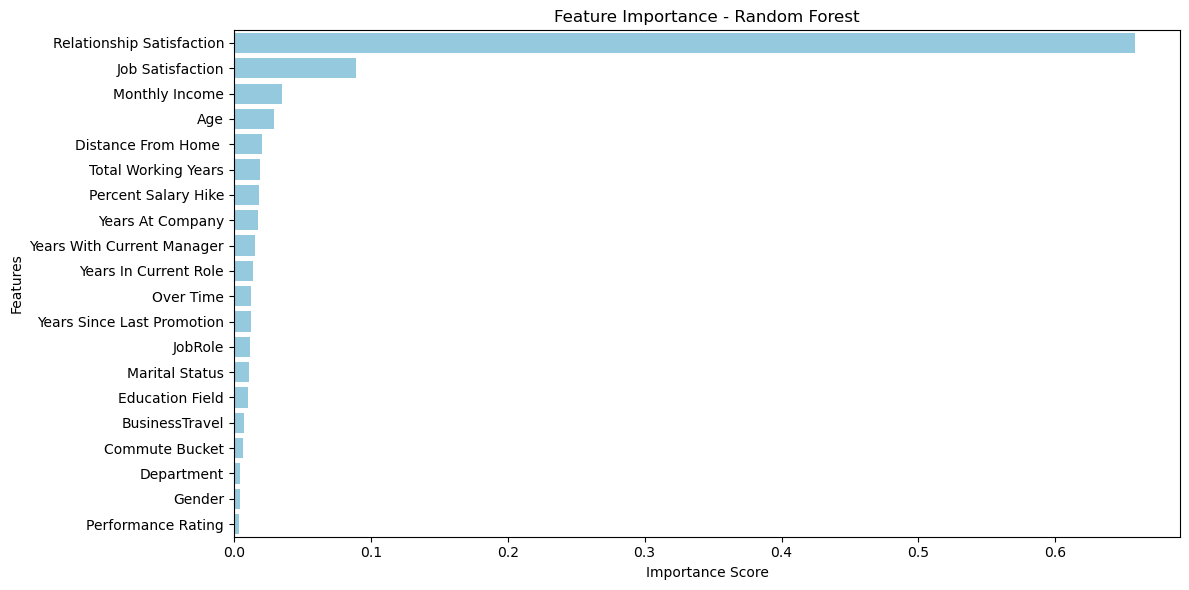

In [13]:
# Step 0: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Load the dataset from Excel
# ⚠️ Replace the file name below with your actual file path
df = pd.read_excel(r"C:\Users\HP\OneDrive\Desktop\Data Analyst\Projects\67b395b530466_TACT4OPS\TACT4OPS\Code&Run_Modelexcel.xlsx")

# Step 2: Drop unnecessary or leakage-prone columns
# Assumption: 'Participant' is an ID, 'Attrition Risk Score' is target-derived
df.drop(columns=['Participant', 'Attrition Risk Score'], errors='ignore', inplace=True)

# Step 3: Basic data cleaning - Handle missing values
# You can choose to fill or drop missing values
df.dropna(inplace=True)  # Alternatively: df.fillna(df.median(), inplace=True)

# Step 4: Label encode categorical variables (for Random Forest, LabelEncoding is sufficient)
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Step 5: Define features (X) and target (y)
# ⚠️ Make sure the column name matches exactly
target_column = 'Estimated Attrition Flag'

if target_column not in df.columns:
    raise ValueError(f"'{target_column}' not found in dataset columns.")

X = df.drop(columns=[target_column])
y = df[target_column]

# Step 6: Split dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 7: Train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = rf.predict(X_test)

# Step 9: Evaluate model performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"\nAccuracy Score: {accuracy_score(y_test, y_pred):.2f}")
# Drop suspected leakage features
X = X.drop(columns=['Over Time', 'Percent Salary Hike', 'Performance Rating', 'Relationship Satisfaction', 'Job Satisfaction'])

# Step 10: Visualize Feature Importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize=(12, 6))
sns.barplot(
    x=feature_importance.sort_values(ascending=False).values,
    y=feature_importance.sort_values(ascending=False).index,
    color='skyblue'
)

plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


In [14]:
# Step 0: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Load the dataset from Excel
# ⚠️ Replace the file name below with your actual file path
df = pd.read_excel(r"C:\Users\HP\OneDrive\Desktop\Data Analyst\Projects\67b395b530466_TACT4OPS\TACT4OPS\Code&Run_Modelexcel.xlsx")

# Step 2: Drop unnecessary or leakage-prone columns
# Assumption: 'Participant' is an ID, 'Attrition Risk Score' is target-derived
df.drop(columns=['Participant', 'Attrition Risk Score'], errors='ignore', inplace=True)

# Step 3: Basic data cleaning - Handle missing values
# You can choose to fill or drop missing values
df.dropna(inplace=True)  # Alternatively: df.fillna(df.median(), inplace=True)

# Step 4: Label encode categorical variables (for Random Forest, LabelEncoding is sufficient)
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Step 5: Define features (X) and target (y)
# ⚠️ Make sure the column name matches exactly
target_column = 'Estimated Attrition Flag'

if target_column not in df.columns:
    raise ValueError(f"'{target_column}' not found in dataset columns.")

X = df.drop(columns=[target_column])
y = df[target_column]

# Step 6: Split dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 7: Train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = rf.predict(X_test)

# Step 9: Evaluate model performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"\nAccuracy Score: {accuracy_score(y_test, y_pred):.2f}")
# Drop suspected leakage features
X = X.drop(columns=['Over Time', 'Percent Salary Hike', 'Performance Rating', 'Relationship Satisfaction', 'Job Satisfaction'])

# Step 10: Visualize Feature Importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize=(12, 6))
sns.barplot(
    x=feature_importance.sort_values(ascending=False).values,
    y=feature_importance.sort_values(ascending=False).index,
    color='skyblue'
)

plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00       124

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180


Confusion Matrix:
[[ 56   0]
 [  0 124]]

Accuracy Score: 1.00


ValueError: Length of values (20) does not match length of index (15)

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.07      0.12        56
           1       0.69      0.94      0.80       124

    accuracy                           0.67       180
   macro avg       0.53      0.51      0.46       180
weighted avg       0.59      0.67      0.59       180

✅ Confusion Matrix:
 [[  4  52]
 [  7 117]]
✅ Accuracy Score: 0.67


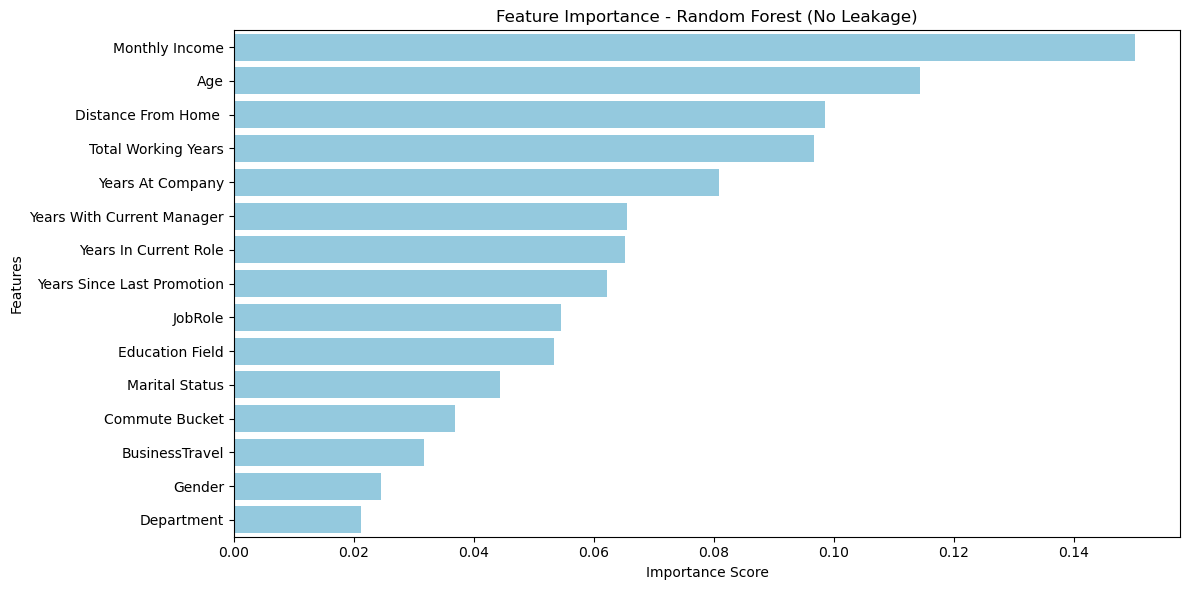

In [15]:
# Step 0: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Load the dataset from Excel
df = pd.read_excel(r"C:\Users\HP\OneDrive\Desktop\Data Analyst\Projects\67b395b530466_TACT4OPS\TACT4OPS\Code&Run_Modelexcel.xlsx")

# Step 2: Drop unnecessary or leakage-prone columns
# 'Participant' is an ID; 'Attrition Risk Score' likely derived from the target
df.drop(columns=['Participant', 'Attrition Risk Score'], errors='ignore', inplace=True)

# Step 3: Handle missing values (Drop rows with NA)
df.dropna(inplace=True)

# Step 4: Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Step 5: Define target variable
target_column = 'Estimated Attrition Flag'

if target_column not in df.columns:
    raise ValueError(f"'{target_column}' not found in dataset.")

# Step 6: Drop leakage-prone features BEFORE training
leakage_cols = [
    'Over Time',                   # Often highly correlated with attrition
    'Percent Salary Hike',        # Often manipulated post-attrition decision
    'Performance Rating',         # Based on evaluations post-risk
    'Relationship Satisfaction',  # May reflect post-exit engagement
    'Job Satisfaction'            # Likely a self-reported outcome tied to attrition
]

X = df.drop(columns=[target_column] + leakage_cols, errors='ignore')
y = df[target_column]

# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 8: Train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 9: Make predictions
y_pred = rf.predict(X_test)

# Step 10: Evaluate performance
print("✅ Classification Report:\n", classification_report(y_test, y_pred))
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"✅ Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")

# Step 11: Visualize Feature Importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=feature_importance.sort_values(ascending=False).values,
    y=feature_importance.sort_values(ascending=False).index,
    color='skyblue'
)
plt.title('Feature Importance - Random Forest (No Leakage)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


In [16]:
print(y.value_counts(normalize=True))


Estimated Attrition Flag
1    0.688543
0    0.311457
Name: proportion, dtype: float64


✅ Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.05      0.09        56
           1       0.69      0.96      0.80       124

    accuracy                           0.68       180
   macro avg       0.53      0.51      0.45       180
weighted avg       0.59      0.68      0.58       180

✅ Confusion Matrix:
 [[  3  53]
 [  5 119]]
✅ Accuracy Score: 0.68


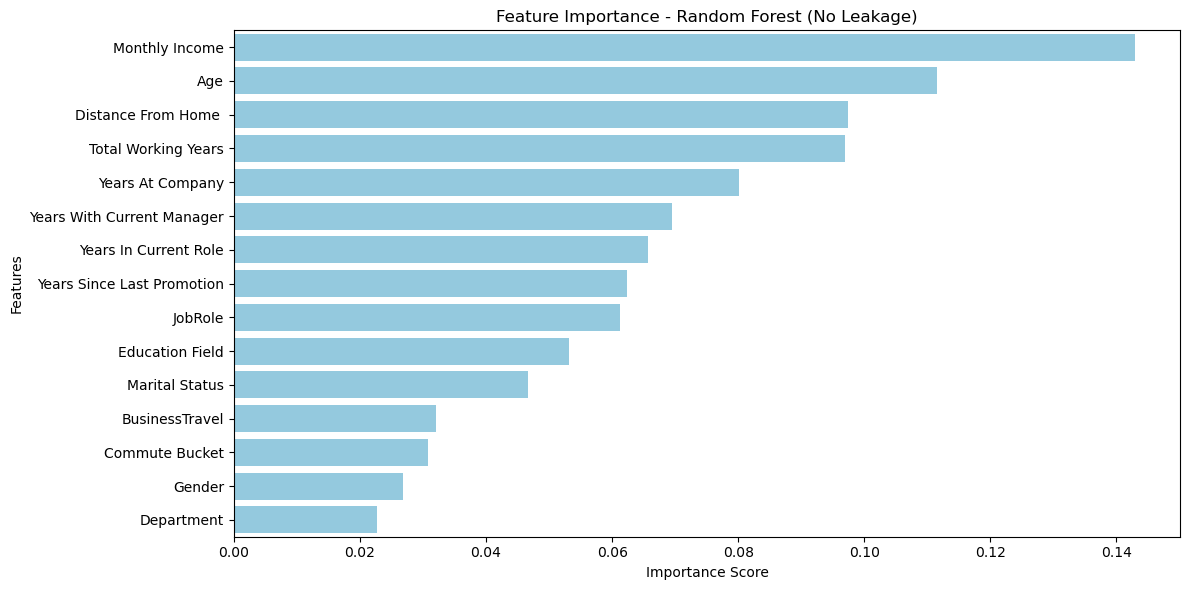

In [17]:
# Step 0: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Load the dataset from Excel
df = pd.read_excel(r"C:\Users\HP\OneDrive\Desktop\Data Analyst\Projects\67b395b530466_TACT4OPS\TACT4OPS\Code&Run_Modelexcel.xlsx")

# Step 2: Drop unnecessary or leakage-prone columns
# 'Participant' is an ID; 'Attrition Risk Score' likely derived from the target
df.drop(columns=['Participant', 'Attrition Risk Score'], errors='ignore', inplace=True)

# Step 3: Handle missing values (Drop rows with NA)
df.dropna(inplace=True)

# Step 4: Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Step 5: Define target variable
target_column = 'Estimated Attrition Flag'

if target_column not in df.columns:
    raise ValueError(f"'{target_column}' not found in dataset.")

# Step 6: Drop leakage-prone features BEFORE training
leakage_cols = [
    'Over Time',                   # Often highly correlated with attrition
    'Percent Salary Hike',        # Often manipulated post-attrition decision
    'Performance Rating',         # Based on evaluations post-risk
    'Relationship Satisfaction',  # May reflect post-exit engagement
    'Job Satisfaction'            # Likely a self-reported outcome tied to attrition
]

X = df.drop(columns=[target_column] + leakage_cols, errors='ignore')
y = df[target_column]

# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 8: Train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# Step 9: Make predictions
y_pred = rf.predict(X_test)

# Step 10: Evaluate performance
print("✅ Classification Report:\n", classification_report(y_test, y_pred))
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"✅ Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")

# Step 11: Visualize Feature Importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=feature_importance.sort_values(ascending=False).values,
    y=feature_importance.sort_values(ascending=False).index,
    color='skyblue'
)
plt.title('Feature Importance - Random Forest (No Leakage)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


In [18]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.38      0.05      0.09        56
           1       0.69      0.96      0.80       124

    accuracy                           0.68       180
   macro avg       0.53      0.51      0.45       180
weighted avg       0.59      0.68      0.58       180

[[  3  53]
 [  5 119]]
Accuracy: 0.6777777777777778


In [19]:
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top Features:\n", feature_importance.head(10))


Top Features:
 Monthly Income                0.142932
Age                           0.111548
Distance From Home            0.097389
Total Working Years           0.096996
Years At Company              0.080080
Years With Current Manager    0.069548
Years In Current Role         0.065717
Years Since Last Promotion    0.062356
JobRole                       0.061179
Education Field               0.053213
dtype: float64


In [20]:
top_features = {
    'Feature': [
        'Monthly Income', 'Age', 'Distance From Home', 'Total Working Years',
        'Years At Company', 'Years With Current Manager', 'Years In Current Role',
        'Years Since Last Promotion', 'JobRole', 'Education Field'
    ],
    'Importance_Score': [
        0.142932, 0.111548, 0.097389, 0.096996, 0.080080,
        0.069548, 0.065717, 0.062356, 0.061179, 0.053213
    ],
    'Business_Insight': [
        'Low salary may push employees to leave',
        'Younger employees may explore more opportunities',
        'Longer commute leads to fatigue and exit',
        'Experienced employees may switch for growth',
        'Low tenure may signal lack of attachment',
        'Manager-employee disconnect may increase exit risk',
        'Same role too long without change causes burnout',
        'Stagnation from no promotion reduces motivation',
        'Certain job roles have higher exit probability',
        'Educational mismatch affects job satisfaction'
    ]
}

df_drivers = pd.DataFrame(top_features)
df_drivers['Importance_Score'] = df_drivers['Importance_Score'].round(4)


In [21]:
df_drivers.to_excel("C:\Users\HP\OneDrive\Desktop\Data Analyst\Projects\67b395b530466_TACT4OPS\TACT4OPS\Prediction Model\Prediction Model.xlsx", index=False)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3623196472.py, line 1)

In [23]:
df_drivers.to_excel(r"C:\Users\HP\OneDrive\Desktop\Data Analyst\Projects\67b395b530466_TACT4OPS\TACT4OPS\Prediction Model\Prediction Model.xlsx", index=False)